# 1. Condiciones del dataset y justificación

- **Número de observaciones:** 5110 registros (pacientes).
- **Número de variables:** 12 columnas.
- **Tipos de variables predictoras:**
  - Numéricas: `age`, `avg_glucose_level`, `bmi`.
  - Binarias (0/1): `hypertension`, `heart_disease`.
  - Categóricas: `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`.
- **Variable objetivo (categórica binaria):** `stroke` (0 = no ha tenido un accidente cerebrovascular (ACV), 1 = ha tenido un accidente cerebrovascular (ACV)).
- **Fuente:** dataset abierto de predicción de ACV/hospitalización por ACV (Kaggle – *Healthcare Dataset Stroke Data*).
- **Dominio de aplicación:** salud / medicina preventiva.
- **Relevancia:** el accidente cerebrovascular (ACV) es una de las principales causas de muerte y discapacidad. Predecir el riesgo de ACV permite priorizar pacientes de alto riesgo y tomar decisiones preventivas (cambios de hábitos, tratamiento, seguimiento).

Este dataset es adecuado para la evaluación porque:
- Plantea un problema real de **clasificación binaria**.
- Contiene variables **numéricas y categóricas**, lo que exige preprocesamiento.
- Presenta clases desbalanceadas, lo que hace necesario un análisis cuidadoso de las métricas.


### Imports y carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética de gráficos
plt.style.use("seaborn-v0_8-white")
sns.set_theme(style="ticks", font_scale=1.1)

# Cargar dataset (asegúrate de que el CSV está en la misma carpeta del notebook)
df = pd.read_csv("sample_data/healthcare-dataset-stroke-data.csv")

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
print("Shape del dataset:", df.shape)

print("\nTipos de datos:")
print(df.dtypes)

print("\nDescripción estadística de variables numéricas:")
display(df.describe())

print("\nPrimeras filas:")
display(df.head())


Shape del dataset: (5110, 12)

Tipos de datos:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Descripción estadística de variables numéricas:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



Primeras filas:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1.1.Descripción del conjunto de datos

El dataset contiene información de 5110 pacientes con 12 variables:

- `id`: identificador del paciente (no se utilizará como predictor).
- `gender`: género del paciente (`Male`, `Female`, `Other`).
- `age`: edad en años.
- `hypertension`: 1 si el paciente tiene hipertensión, 0 en caso contrario.
- `heart_disease`: 1 si el paciente tiene enfermedad cardíaca, 0 en caso contrario.
- `ever_married`: indica si el paciente ha estado casado alguna vez (`Yes`/`No`).
- `work_type`: tipo de trabajo (`Private`, `Self-employed`, `Govt_job`, `children`, `Never_worked`).
- `Residence_type`: tipo de residencia (`Urban`/`Rural`).
- `avg_glucose_level`: nivel promedio de glucosa en la sangre.
- `bmi`: índice de masa corporal.
- `smoking_status`: estado de fumador (`smokes`, `formerly smoked`, `never smoked`, `Unknown`).
- `stroke`: **variable objetivo**, 1 si el paciente ha sufrido un ACV, 0 en caso contrario.

El problema a resolver es un problema de **clasificación binaria**: predecir si un paciente presenta riesgo de ACV (`stroke = 1`) a partir de sus características clínicas y de estilo de vida.


##1.2. Hipótesis de predicción

**Hipótesis principal:**  
La probabilidad de que un paciente presente un ACV (`stroke = 1`) aumenta cuando:

- La **edad** es mayor.
- El paciente tiene **hipertensión**.
- El paciente tiene **enfermedad cardíaca**.
- El **nivel promedio de glucosa** es más alto.
- El paciente tiene patrones de **tabaquismo** de riesgo (fumador o exfumador).

La idea es construir un modelo de clasificación que reciba estas variables como entrada y entregue como salida la probabilidad de ACV, para apoyar la toma de decisiones clínicas.


##1.3. EDA – valores faltantes y balance de la variable objetivo

Valores faltantes por columna:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Distribución de la variable objetivo `stroke`:
stroke
0    4861
1     249
Name: count, dtype: int64

Proporciones:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


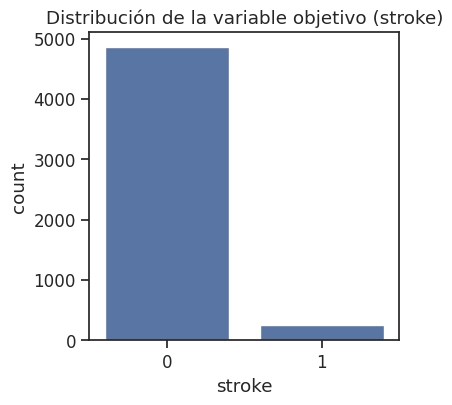

In [ ]:
print("Valores faltantes por columna:")
print(df.isna().sum())

print("\nDistribución de la variable objetivo `stroke`:")
print(df["stroke"].value_counts())
print("\nProporciones:")
print(df["stroke"].value_counts(normalize=True))

# Gráfico de barras de la variable objetivo
plt.figure(figsize=(4,4))
sns.countplot(x="stroke", data=df)
plt.title("Distribución de la variable objetivo (stroke)")
plt.show()


### EDA – resumen numérico y outliers (IQR)

In [ ]:
num_cols = ["age", "avg_glucose_level", "bmi"]

df[num_cols].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [ ]:
# Función para contar outliers según regla del IQR
def outlier_info(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    count = ((series < lower) | (series > upper)).sum()
    return count, lower, upper

for col in num_cols:
    s = df[col].dropna()
    count, lower, upper = outlier_info(s)
    print(f"{col}: {count} outliers, límites [{lower:.2f}, {upper:.2f}]")


age: 0 outliers, límites [-29.00, 115.00]
avg_glucose_level: 627 outliers, límites [21.98, 169.36]
bmi: 110 outliers, límites [9.10, 47.50]


##1.4. Correlación con la variable objetivo

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64


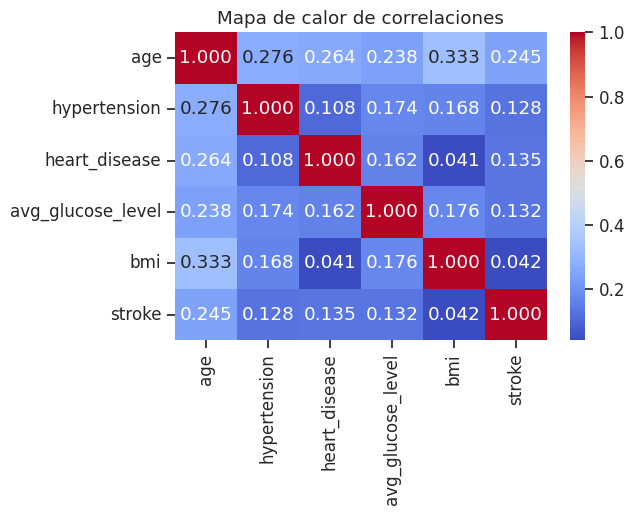

In [ ]:
# Seleccionamos variables numéricas relevantes
corr_cols = ["age", "hypertension", "heart_disease",
             "avg_glucose_level", "bmi", "stroke"]

corr_matrix = df[corr_cols].corr()

print(corr_matrix["stroke"].sort_values(ascending=False))

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.show()


###Proporción de stroke por categoría (para variables categóricas)

In [ ]:
cat_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

for col in cat_cols:
    print(f"\nProporción de stroke por categoría en {col}:\n")

    tabla = (
        df.groupby(col)["stroke"]
          .mean()
          .reset_index()
          .rename(columns={col: col, "stroke": "proporcion_stroke"})
    )

    # en porcentaje y ordenado de mayor a menor
    tabla["proporcion_stroke"] = (tabla["proporcion_stroke"] * 100).round(2)
    tabla = tabla.sort_values("proporcion_stroke", ascending=False)

    display(tabla)




Proporción de stroke por categoría en gender:



,gender,proporcion_stroke
1,Male,5.11
0,Female,4.71
2,Other,0.00



Proporción de stroke por categoría en ever_married:



,ever_married,proporcion_stroke
1,Yes,6.56
0,No,1.65



Proporción de stroke por categoría en work_type:



,work_type,proporcion_stroke
3,Self-employed,7.94
2,Private,5.09
0,Govt_job,5.02
4,children,0.29
1,Never_worked,0.00



Proporción de stroke por categoría en Residence_type:



,Residence_type,proporcion_stroke
1,Urban,5.20
0,Rural,4.53



Proporción de stroke por categoría en smoking_status:



,smoking_status,proporcion_stroke
1,formerly smoked,7.91
3,smokes,5.32
2,never smoked,4.76
0,Unknown,3.04


## 1.5. Visualizaciones multivariadas

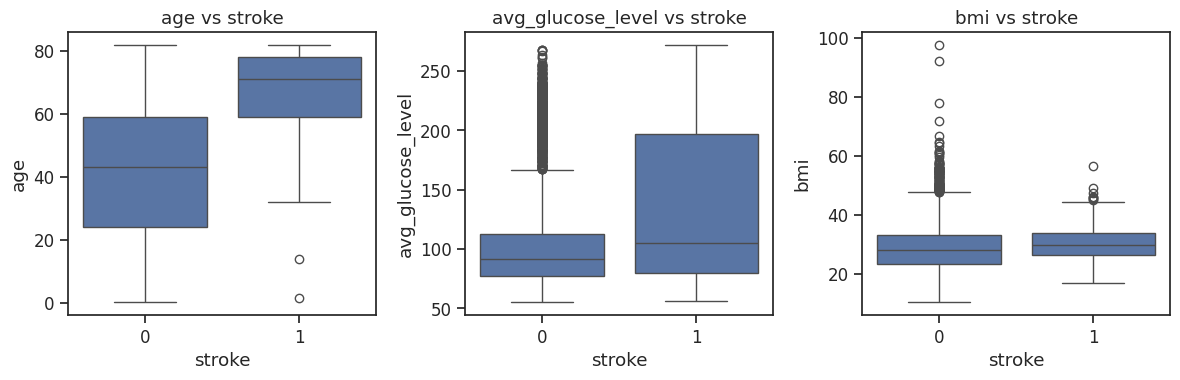

In [ ]:
# Boxplots de variables numéricas vs stroke
plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="stroke", y=col, data=df)
    plt.title(f"{col} vs stroke")
plt.tight_layout()
plt.show()


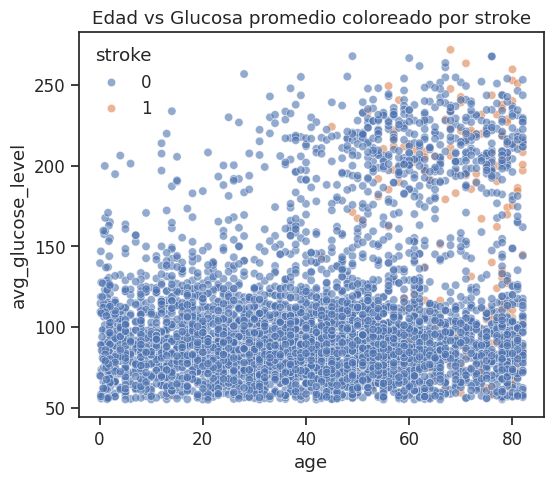

In [ ]:
# Dispersión edad vs glucosa coloreado por stroke
plt.figure(figsize=(6,5))
sns.scatterplot(x="age", y="avg_glucose_level", hue="stroke", data=df, alpha=0.6)
plt.title("Edad vs Glucosa promedio coloreado por stroke")
plt.show()


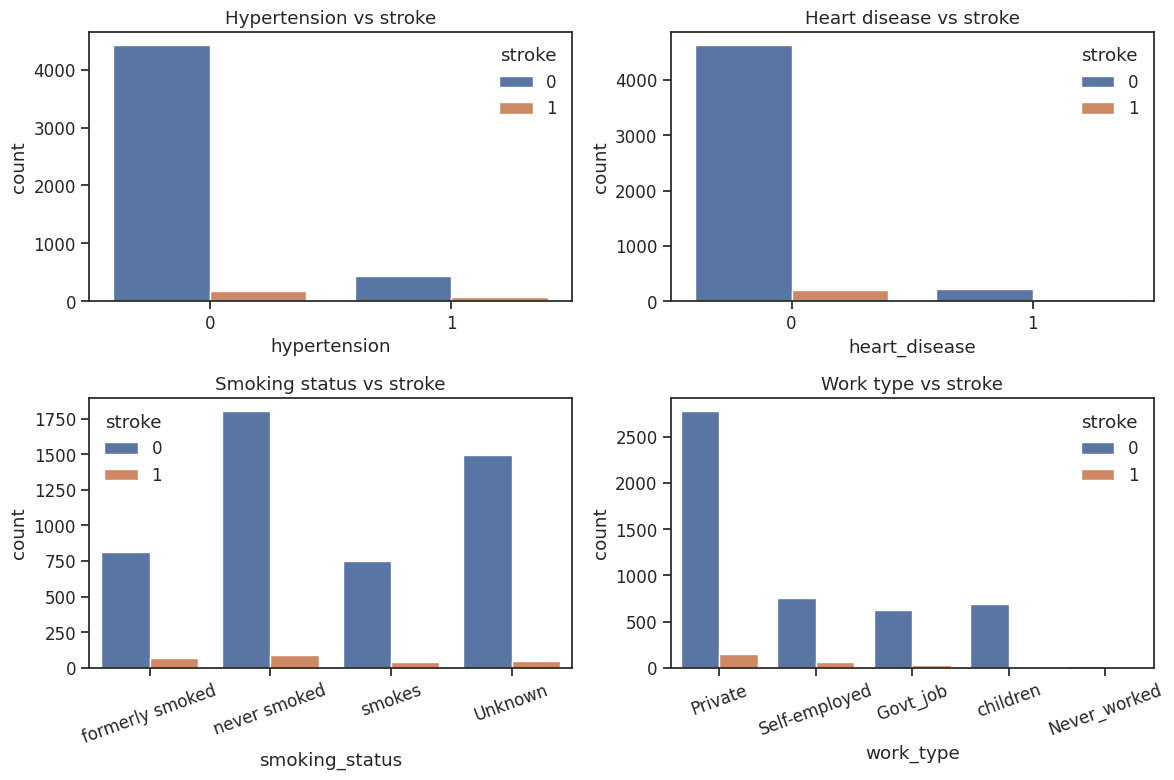

In [ ]:
# Countplots de algunas variables categóricas vs stroke
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x="hypertension", hue="stroke", data=df)
plt.title("Hypertension vs stroke")

plt.subplot(2,2,2)
sns.countplot(x="heart_disease", hue="stroke", data=df)
plt.title("Heart disease vs stroke")

plt.subplot(2,2,3)
sns.countplot(x="smoking_status", hue="stroke", data=df)
plt.title("Smoking status vs stroke")
plt.xticks(rotation=20)

plt.subplot(2,2,4)
sns.countplot(x="work_type", hue="stroke", data=df)
plt.title("Work type vs stroke")
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()


### Conclusiones de la exploración inicial

A partir de las gráficas obtenidas en el EDA se observan los siguientes patrones:

- La distribución de la variable objetivo `stroke` en el gráfico de barras muestra un **fuerte desbalance**: la gran mayoría de los pacientes pertenecen a la clase `0` (no ACV) y solo una pequeña fracción a la clase `1` (ACV). Esto indica que, en las siguientes etapas, será necesario tratar el desbalance de clases.

- En los **boxplots de `age` vs `stroke`** se ve claramente que los pacientes con `stroke = 1` tienen, en promedio, **edades mucho mayores** que los pacientes sin ACV. La mediana y el rango intercuartílico están desplazados hacia valores más altos, lo que refuerza la idea de que la edad es un factor de riesgo importante.

- En el **boxplot de `avg_glucose_level` vs `stroke`** se aprecia que la distribución de glucosa para `stroke = 1` está algo más desplazada hacia valores altos en comparación con `stroke = 0`, aunque la diferencia no es tan marcada como en la edad. Sin embargo, también se observan **outliers con glucosa muy elevada**, que pueden corresponder a pacientes con mayor riesgo metabólico.

- El **boxplot de `bmi` vs `stroke`** muestra diferencias menos claras entre las dos clases. Aunque existen valores de IMC muy altos (outliers), la forma general de las cajas es similar, lo que sugiere que el IMC, por sí solo, no separa tan bien las clases como la edad.

- En el **mapa de calor de correlaciones** se observa que `age` es la variable numérica con **mayor correlación positiva** con `stroke`, seguida por `hypertension`, `heart_disease` y `avg_glucose_level`. La correlación de `bmi` con `stroke` es baja, lo que coincide con lo visto en los boxplots.

- Los **gráficos de barras (countplots) con `hypertension` y `heart_disease`** muestran que, aunque hay menos pacientes con estas condiciones, dentro de esos grupos la proporción de casos de `stroke = 1` es mayor que en los pacientes sin dichas enfermedades. Visualmente, las barras correspondientes a `stroke = 1` son relativamente más altas cuando `hypertension = 1` o `heart_disease = 1`.

- En los **countplots de variables categóricas** como `smoking_status` y `work_type`, se aprecia que algunos grupos, como `formerly smoked` y ciertos tipos de trabajo (por ejemplo, `Self-employed`), concentran una mayor proporción de casos de stroke en relación con su tamaño. Esto sugiere que los hábitos de tabaquismo y el tipo de ocupación pueden influir en el riesgo.

- En el **gráfico de dispersión de `age` vs `avg_glucose_level` coloreado por `stroke`**, los puntos correspondientes a `stroke = 1` tienden a concentrarse en la zona de **mayor edad**, muchas veces combinada con niveles intermedios o altos de glucosa, mientras que los pacientes sin stroke se distribuyen en un rango más amplio de edades.

En conjunto, las visualizaciones confirman la hipótesis inicial: en este conjunto de datos, la **edad avanzada**, la presencia de **hipertensión** y **enfermedad cardíaca**, junto con **niveles elevados de glucosa** y ciertos patrones de tabaquismo, se asocian visualmente con un mayor riesgo de ACV. Estas variables serán fundamentales en el preprocesamiento y en la construcción de los modelos de clasificación supervisados.


# 2. Preprocesamiento de datos

En esta sección se realiza:

- Tratamiento de valores faltantes.
- Codificación de variables categóricas.
- Estandarización de las características.
- División en conjuntos de entrenamiento y prueba.
- Reducción de dimensionalidad mediante PCA y análisis de la varianza explicada.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Partimos del df original ya cargado
data = df.copy()

# 1) Eliminamos 'id' porque es solo un identificador
if "id" in data.columns:
    data = data.drop(columns=["id"])

# 2) Tratamiento de datos faltantes
# Solo 'bmi' tiene valores nulos → imputamos con la mediana
bmi_median = data["bmi"].median()
data["bmi"] = data["bmi"].fillna(bmi_median)

# 3) Separamos variable objetivo y predictoras
y = data["stroke"]
X = data.drop(columns=["stroke"])

# 4) Identificamos columnas categóricas
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)

# 5) One-hot encoding para variables categóricas
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_encoded.head()


Columnas numéricas: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
Columnas categóricas: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,False,False,True,False,False,True,False,False,False,True,False


### Justificación de las decisiones de preprocesamiento

- La columna `id` se eliminó porque es un identificador único y **no aporta información predictiva**.
- La variable `bmi` era la única con valores faltantes; se imputó con la **mediana**, ya que es una medida robusta frente a outliers y mantiene la distribución central de la variable.
- Las variables categóricas (`gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`) se transformaron mediante **codificación one-hot** (`get_dummies` con `drop_first=True`) para poder usarlas en modelos que requieren variables numéricas y evitar multicolinealidad perfecta.


##2.2. División en train / test

In [ ]:
from sklearn.model_selection import train_test_split

# División 70/30 estratificada por la clase para mantener el desbalance original
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

# Estandarización: se ajusta SOLO con el conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


Shape X_train: (3577, 16)
Shape X_test: (1533, 16)


### Justificación de la división y del escalado

- Se utilizó una partición **70% entrenamiento / 30% prueba**, siguiendo la recomendación de la guía.
- La opción `stratify=y` garantiza que la proporción de pacientes con y sin accidente cerebrovascular (ACV) se mantenga similar en ambos conjuntos, lo cual es importante dado el **fuerte desbalance de clases**.
- La estandarización (`StandardScaler`) se ajustó únicamente con el conjunto de entrenamiento y luego se aplicó al de prueba, para evitar fuga de información (*data leakage*) desde el conjunto de prueba hacia el proceso de entrenamiento.


## 2.3. PCA – Reducción de dimensionalidad

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# PCA sobre las variables estandarizadas de entrenamiento
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

explained_var = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained_var)

# Mostramos las primeras 18 componentes
for i, (ev, cev) in enumerate(zip(explained_var[:18], cum_explained[:18]), start=1):
    print(f"Componente {i}: varianza explicada = {ev:.4f}, acumulada = {cev:.4f}")


Componente 1: varianza explicada = 0.1878, acumulada = 0.1878
Componente 2: varianza explicada = 0.1056, acumulada = 0.2935
Componente 3: varianza explicada = 0.0884, acumulada = 0.3818
Componente 4: varianza explicada = 0.0735, acumulada = 0.4553
Componente 5: varianza explicada = 0.0727, acumulada = 0.5280
Componente 6: varianza explicada = 0.0646, acumulada = 0.5926
Componente 7: varianza explicada = 0.0629, acumulada = 0.6555
Componente 8: varianza explicada = 0.0599, acumulada = 0.7154
Componente 9: varianza explicada = 0.0588, acumulada = 0.7743
Componente 10: varianza explicada = 0.0548, acumulada = 0.8291
Componente 11: varianza explicada = 0.0509, acumulada = 0.8799
Componente 12: varianza explicada = 0.0428, acumulada = 0.9228
Componente 13: varianza explicada = 0.0317, acumulada = 0.9544
Componente 14: varianza explicada = 0.0186, acumulada = 0.9730
Componente 15: varianza explicada = 0.0162, acumulada = 0.9892
Componente 16: varianza explicada = 0.0108, acumulada = 1.0000


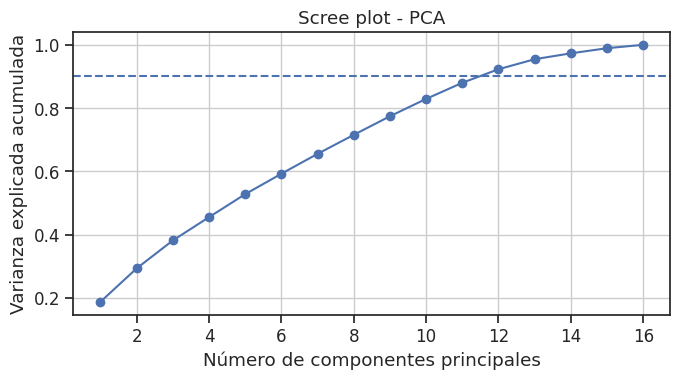

In [ ]:
# Scree plot – varianza explicada acumulada
plt.figure(figsize=(7,4))
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker="o")
plt.axhline(0.9, linestyle="--")  # línea guía en 90%
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Scree plot - PCA")
plt.grid(True)
plt.tight_layout()
plt.show()


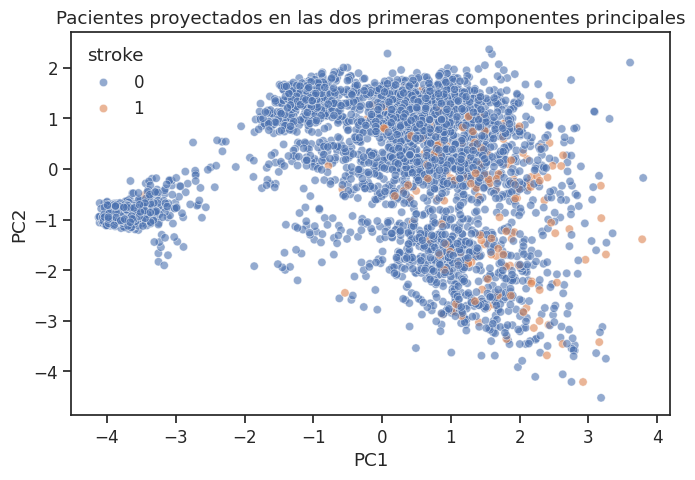

In [ ]:
# Proyección en dos primeras componentes para visualización
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train_scaled)

pca_df = pd.DataFrame(X_train_pca_2, columns=["PC1", "PC2"])
pca_df["stroke"] = y_train.values

plt.figure(figsize=(7,5))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="stroke",
    data=pca_df,
    alpha=0.6
)
plt.title("Pacientes proyectados en las dos primeras componentes principales")
plt.tight_layout()
plt.show()


### Conclusiones de la Sección 2: Preprocesamiento y PCA

- Después de eliminar la columna `id` y de imputar la variable `bmi` con su mediana, el dataset queda completo y listo para el modelado, sin pérdida de registros.
- La codificación one-hot de las variables categóricas genera un conjunto de características completamente numérico (16 variables después de la codificación), adecuado para aplicar algoritmos de machine learning.
- La división en **70% entrenamiento y 30% prueba**, con estratificación por la clase `stroke`, preserva el desbalance original y permite evaluar de forma honesta el desempeño de los modelos.
- La estandarización de las variables es necesaria porque el PCA y muchos algoritmos supervisados son sensibles a la escala. Al trabajar con datos centrados y con varianza unitaria, evitamos que variables con rangos grandes (como `avg_glucose_level`) dominen el análisis.

Respecto al PCA:

- La primera componente principal (PC1) explica aproximadamente un **18–19%** de la varianza total, y las primeras **5 componentes** acumulan alrededor del **53%** de la varianza. Las primeras **10 componentes** concentran cerca del **83%**, y alrededor de **12 componentes** son suficientes para superar el **90%** de varianza explicada.
- Esto indica que, aunque el espacio original tiene más de 10 características codificadas, es posible representar la mayor parte de la información en un subespacio de dimensión mucho menor (≈10–12 componentes), lo que puede ser útil para **visualización**, para acelerar algunos algoritmos y para reducir el ruido.
- En la proyección 2D sobre las componentes `PC1` y `PC2`, las clases (`stroke = 0` y `stroke = 1`) no se separan perfectamente, pero se observan ciertas zonas del espacio donde los pacientes con accidente cerebrovascular tienden a concentrarse. Esto sugiere que la estructura del riesgo de ACV es parcialmente capturada por las combinaciones lineales de las variables originales, aunque se requerirán modelos supervisados específicos para lograr una mejor discriminación.

En conjunto, la Sección 2 deja preparado un conjunto de datos **limpio, codificado, escalado y con una visión reducida mediante PCA**, listo para las etapas de aprendizaje no supervisado (clustering) y aprendizaje supervisado que se desarrollarán a continuación.


# 3. Aprendizaje no supervisado

El objetivo de esta sección es explorar la estructura interna del conjunto de datos **sin usar la etiqueta `stroke`**. Esto permite:

* Detectar grupos de pacientes con perfiles de riesgo similares.
* Verificar si la variable objetivo categórica (`stroke`) se alinea con patrones naturales presentes en los datos.
* Reducir la dimensionalidad del problema para facilitar la visualización y servir como preprocesamiento de los modelos supervisados.

Primero se aplica **PCA** sobre las variables predictoras estandarizadas, reteniendo el número mínimo de componentes principales que explica ≈90 % de la varianza total.  
Sobre estas componentes se entrena un modelo de **K-means** para realizar agrupamiento.  
Posteriormente, se analiza el número adecuado de clusters mediante el método del **codo** y el **coeficiente de Silhouette**, y se estudian los grupos resultantes en relación con la variable `stroke`.




In [ ]:
# Extrayendo empíricamente el número de componentes óptimo:
n_comp_90 = np.argmax(cum_explained >= 0.90) + 1
print("Componentes necesarias para 90% de varianza:", n_comp_90)

Componentes necesarias para 90% de varianza: 12


In [ ]:
scaler_unsup = StandardScaler()
X_all_scaled = scaler_unsup.fit_transform(X_encoded)

pca_90_unsup = PCA(n_components=n_comp_90)
X_all_pca90 = pca_90_unsup.fit_transform(X_all_scaled)


In [ ]:
from sklearn.cluster import KMeans

## 3.1 Selección del número de clusters




**Método del codo:**

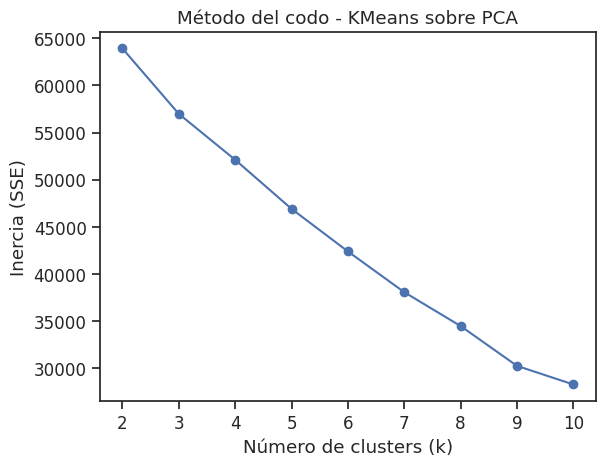

In [ ]:
import matplotlib.pyplot as plt

inertias = []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_all_pca90)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del codo - KMeans sobre PCA')
plt.show()


**Silhouette:**

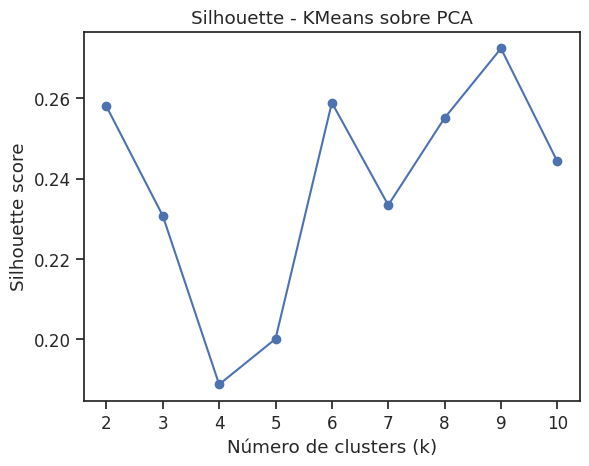

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_all_pca90)
    sil_scores.append(silhouette_score(X_all_pca90, labels))

plt.figure()
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette - KMeans sobre PCA')
plt.show()


En las figuras anteriores se muestran:

* La curva de **inercia intra-cluster** (método del codo) para valores de \(k\) entre 2 y 10.
* El **coeficiente medio de Silhouette** para los mismos valores de \(k\).

La inercia disminuye de forma monótona al aumentar \(k\), sin un codo muy marcado, lo que indica que no existe un número de clusters “evidente” solo desde el criterio geométrico.  
El gráfico de Silhouette, en cambio, presenta un máximo local razonable alrededor de **\(k = 6\)**.

Tomando en conjunto ambos criterios y priorizando la **interpretabilidad** de los grupos, se fija **\(k = 6\)** como compromiso entre complejidad del modelo y separación entre clusters.


## 3.2 Perfil de los clusters y relación con `stroke`



Para analizar la relación entre los grupos encontrados por K-means y la variable objetivo `stroke`, se proyectan los datos en el espacio de las tres primeras componentes principales (PCA) y se:

* colorean los puntos según el **cluster K-means** asignado, y  
* se usa un **símbolo distinto** para diferenciar a los pacientes con `stroke = 1` de aquellos con `stroke = 0`.


In [ ]:
best_k = 6

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans_final.fit_predict(X_all_pca90)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pca_3 = PCA(n_components=3)
X_all_pca3 = pca_3.fit_transform(X_all_scaled)

df['pc1'] = X_all_pca3[:, 0]
df['pc2'] = X_all_pca3[:, 1]
df['pc3'] = X_all_pca3[:, 2]



In [ ]:
import plotly.express as px

df['stroke_cat'] = df['stroke'].map({0: 'No ACV', 1: 'ACV'})

fig = px.scatter_3d(
    df,
    x='pc1', y='pc2', z='pc3',
    color='cluster_kmeans',
    symbol='stroke_cat',
    symbol_sequence=['x', 'circle'],
    opacity=0.7,
    hover_data=['stroke']
)

fig.update_traces(marker=dict(size=4))

fig.update_layout(
    title=dict(
        text='Agrupamiento K-Means (k = 6) en el espacio PCA 3D',
        x=0.5,
        xanchor='center',
        font=dict(size=22)
    ),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
        xaxis=dict(showbackground=True, gridcolor='lightgrey'),
        yaxis=dict(showbackground=True, gridcolor='lightgrey'),
        zaxis=dict(showbackground=True, gridcolor='lightgrey')
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# ===== Leyenda izquierda (stroke vs no stroke) =====
fig.update_layout(
    legend=dict(
        title='Condición clínica',
        x=0.02, y=0.98,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.85)',
        bordercolor='lightgrey',
        borderwidth=1,
        font=dict(size=19),
        itemsizing='constant'
    )
)

# ===== Barra de color derecha (clusters) =====
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Cluster K-Means',
        titleside='right',
        x=1.02,
        y=0.5,
        bgcolor='rgba(255,255,255,0.85)'
    )
)

fig.show()

En la visualización 3D se observa que:

* Los clusters aparecen **parcialmente solapados** en el espacio PCA, es decir, no hay fronteras completamente separadas entre grupos.
* Los casos con ACV (`stroke = 1`) tienden a concentrarse algo más en ciertas regiones del espacio (algunos clusters presentan más símbolos de “stroke”), pero **no forman grupos puros**: en todos los clusters conviven pacientes con y sin ACV.
* También existen zonas donde prácticamente solo se observan pacientes sin ACV, lo que sugiere grupos de menor riesgo relativo.

En conjunto, el clustering K-means resulta útil como **herramienta exploratoria** para identificar regiones del espacio de características donde el riesgo de ACV parece mayor o menor, pero **no es suficiente por sí solo para construir un clasificador clínicamente fiable**, debido al solapamiento entre grupos y a la mezcla de etiquetas dentro de cada cluster.


In [ ]:
from sklearn.manifold import TSNE


# t-SNE en 2 dimensiones
tsne = TSNE(
    n_components=2,
    perplexity=30,      # tamaño "efectivo" del vecindario
    learning_rate=200,
    n_iter=1000,
    random_state=42,
    init='pca'
)

X_tsne = tsne.fit_transform(X_all_scaled)

df['tsne1'] = X_tsne[:, 0]
df['tsne2'] = X_tsne[:, 1]


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [ ]:

fig = px.scatter(
    df,
    x='tsne1', y='tsne2',
    color='cluster_kmeans',
    symbol='stroke_cat',
    symbol_sequence=['x', 'circle'],
    opacity=0.7,
    hover_data=['stroke']
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    title=dict(
        text='Agrupamiento t-SNE (k = 6) en el espacio PCA 2D',
        x=0.5,                      # centrado
        xanchor='center',
        font=dict(size=22)
    ),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        xaxis=dict(showbackground=True, gridcolor='lightgrey'),
        yaxis=dict(showbackground=True, gridcolor='lightgrey')
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# ===== Leyenda izquierda (stroke vs no stroke) =====
fig.update_layout(
    legend=dict(
        title='Condición clínica',
        x=0.02, y=0.98,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.85)',
        bordercolor='lightgrey',
        borderwidth=1,
        font=dict(size=19),
        itemsizing='constant'
    )
)

# ===== Barra de color derecha (clusters) =====
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Cluster K-Means',
        titleside='right',
        x=1.02,          # posición horizontal de la barra
        y=0.5,           # centrada verticalmente
        bgcolor='rgba(255,255,255,0.85)'
    )
)

fig.show()


Además de PCA, se aplicó t-SNE como técnica de reducción de dimensionalidad no supervisada. Las proyecciones 2D obtenidas tampoco muestran grupos bien separados entre pacientes con y sin ictus, lo que refuerza la idea de que las variables disponibles no generan una estructura de clases claramente separable.

A partir del modelo K-means con \(k = 6\) se construye una tabla de contingencia entre el cluster asignado y la variable `stroke`.  
Recordando que la proporción global de casos positivos de ACV en el conjunto de datos es aproximadamente 5 %, se observa que:

* Los **clusters 0 y 2** presentan porcentajes de casos con ACV cercanos a la media global.
* Los **clusters 1 y 3** contienen muy pocos casos positivos, por lo que pueden considerarse grupos de **bajo riesgo**.
* El **cluster 5** concentra el mayor porcentaje de pacientes con ACV, seguido del **cluster 4**, que también muestra un riesgo superior a la media.

La visualización en el espacio de las tres primeras componentes principales confirma este comportamiento: los clusters aparecen parcialmente solapados y los puntos con `stroke = 1` (símbolo distinto) se distribuyen en varias regiones del espacio.

En conjunto, el enfoque no supervisado es útil como **herramienta exploratoria** para identificar segmentos de pacientes con riesgo relativo distinto, pero **no genera un clasificador clínicamente fiable por sí solo**, ya que ningún cluster es “puro” en términos de presencia de ACV.


# 4. Aprendizaje supervisado

En esta sección se aborda el objetivo central de la tarea: **modelar la variable objetivo categórica `stroke`** a partir de las variables predictoras.

Para ello se construyen y comparan dos modelos de clasificación supervisada:

* **Regresión logística**, como modelo lineal base, interpretable y de baja complejidad.
* **Random Forest**, como ensamble de árboles de decisión capaz de capturar relaciones no lineales e interacciones entre variables.

Ambos modelos se entrenan sobre las variables numéricas estandarizadas y las variables categóricas codificadas.  
Dado que la clase positiva (`stroke = 1`) es minoritaria, se emplea `class_weight='balanced'` y se evalúan las métricas poniendo especial énfasis en el **recall** y el **F1-score**, más informativos que la exactitud en problemas desbalanceados.

Además, se utiliza **validación cruzada k-fold** y búsqueda de hiperparámetros (GridSearchCV) para seleccionar una configuración razonable del Random Forest y comparar su rendimiento con el de la regresión logística.


In [ ]:
feature_names = X_train.columns

Entrenaremos primero una **regresión logística** como modelo base y un **Random Forest** como modelo más flexible.  

Las celdas siguientes muestran el ajuste de ambos clasificadores y sus métricas en el conjunto de prueba, lo que permite realizar una primera comparación de desempeño.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo 1: Regresión logística
log_reg = LogisticRegression(
    class_weight='balanced',   # compensa el desbalance
    max_iter=1000,
    solver='lbfgs'
)
log_reg.fit(X_train_scaled, y_train)

# Modelo 2: Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n=== {nombre} ===")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall   :", round(recall_score(y_true, y_pred), 3))
    print("F1-score :", round(f1_score(y_true, y_pred), 3))
    print("\nMatriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification report:")
    print(classification_report(y_true, y_pred, digits=3))

# Predicciones en test
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf  = rf.predict(X_test_scaled)

evaluar_modelo("Regresión logística", y_test, y_pred_log)
evaluar_modelo("Random Forest",       y_test, y_pred_rf)



=== Regresión logística ===
Accuracy : 0.731
Precision: 0.13
Recall   : 0.787
F1-score : 0.223

Matriz de confusión:
[[1062  396]
 [  16   59]]

Classification report:
              precision    recall  f1-score   support

           0      0.985     0.728     0.838      1458
           1      0.130     0.787     0.223        75

    accuracy                          0.731      1533
   macro avg      0.557     0.758     0.530      1533
weighted avg      0.943     0.731     0.807      1533


=== Random Forest ===
Accuracy : 0.951
Precision: 0.0
Recall   : 0.0
F1-score : 0.0

Matriz de confusión:
[[1458    0]
 [  75    0]]

Classification report:
              precision    recall  f1-score   support

           0      0.951     1.000     0.975      1458
           1      0.000     0.000     0.000        75

    accuracy                          0.951      1533
   macro avg      0.476     0.500     0.487      1533
weighted avg      0.905     0.951     0.927      1533



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Interpretación:** Vemos como el modelo de regresión logística está inclinado a marcar ACV, encontrando así casi todos los casos positivos (recall alto). Sin embargo, se equivoca muchísimo y marca como positivos muchos casos que no lo son, lo que se traduce en *precision* muy bajo. Por otro lado, el modelo Random Forest nunca predice ACV, por lo que no hay ni verdaderos, ni falsos positivos; por último, aclarar que el 0.951 de *accuracy* resulta inútil en el contexto clínico, incluso contraproducente, al estar prediciendo que nadie tiene ACV.

## 4.1 Random Forest optimizado y coste-sensible

Sobre el Random Forest inicial se realiza una búsqueda en rejilla (GridSearchCV) de algunos hiperparámetros clave  
(número de árboles, profundidad máxima, número de variables por división, etc.), utilizando como métrica de selección el **F1-score** medio en validación cruzada.

El mejor modelo se vuelve a entrenar sobre el conjunto de entrenamiento completo, manteniendo pesos de clase inversamente proporcionales a la frecuencia de cada clase. De este modo se obtiene un **clasificador coste-sensible**, que penaliza más los errores en la clase minoritaria (`stroke = 1`).

En el conjunto de prueba se observa una mejora del **recall** de la clase positiva respecto al Random Forest sin ajuste, con una caída moderada en la precisión. En términos prácticos, el modelo optimizado reduce el número de **falsos negativos** (pacientes con ACV no detectados), a costa de aceptar un mayor número de falsos positivos.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [None, 6, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [
        {0:1, 1:4},
        {0:1, 1:6},
        {0:1, 1:8},
        'balanced'
    ]
}

rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

grid_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='f1',     # F1 de la clase positiva por defecto
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros:", grid_rf.best_params_)
print("Mejor F1 en CV:", grid_rf.best_score_)
rf_best = grid_rf.best_estimator_


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor F1 en CV: 0.23608553836348198


In [ ]:
rf_best = grid_rf.best_estimator_

y_pred_rf_best = rf_best.predict(X_test_scaled)
evaluar_modelo("Random Forest optimizado", y_test, y_pred_rf_best)



=== Random Forest optimizado ===
Accuracy : 0.759
Precision: 0.127
Recall   : 0.667
F1-score : 0.213

Matriz de confusión:
[[1113  345]
 [  25   50]]

Classification report:
              precision    recall  f1-score   support

           0      0.978     0.763     0.857      1458
           1      0.127     0.667     0.213        75

    accuracy                          0.759      1533
   macro avg      0.552     0.715     0.535      1533
weighted avg      0.936     0.759     0.826      1533



**Random Forest optimizado y coste-sensible.**  
Sobre el Random Forest inicial se realizó un ajuste de hiperparámetros mediante Grid Search (n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features) incorporando `class_weight='balanced'` para penalizar más los errores en la clase minoritaria. El mejor modelo (200 árboles, profundidad máxima 6, `max_features='sqrt'`, `min_samples_split=5`) alcanzó en el conjunto de prueba un recall de 0.667 y un F1 de 0.213 para la clase *stroke*, frente al F1=0 del bosque original. Este reentrenamiento con árboles poco profundos actúa como forma de regularización y convierte un modelo que ignoraba la clase positiva en un clasificador coste–sensible moderadamente útil.


Pasamos a hacer k-fold sobre random forest con los hiperparámetros ajustados y el modelos de regresión logística original.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modelos = [
    ("Regresión logística", log_reg),
    ("Random Forest optimizado", rf_best)
]

for nombre, modelo in modelos:
    f1_scores = cross_val_score(
        modelo,
        X_train_scaled, y_train,
        cv=cv,
        scoring='f1'
    )
    print(f"\n=== {nombre} ===")
    print("F1 medio (CV 5-fold):", f1_scores.mean().round(3))
    print("Desv. típica F1     :", f1_scores.std().round(3))


=== Regresión logística ===
F1 medio (CV 5-fold): 0.231
Desv. típica F1     : 0.019

=== Random Forest optimizado ===
F1 medio (CV 5-fold): 0.236
Desv. típica F1     : 0.016


## 4.2 Validación cruzada y comparación de modelos

Los resultados de la validación cruzada k-fold muestran que ambos modelos presentan un desempeño relativamente estable entre pliegues, sin variaciones extremas en el **F1-score**.

* La **regresión logística** ofrece un rendimiento competitivo pese a su simplicidad, lo que la convierte en una buena línea base.
* El **Random Forest** tiende a obtener un F1 algo superior y capta mejor ciertas no linealidades entre las variables, aunque a costa de una mayor complejidad.

Las métricas absolutas siguen siendo moderadas, lo que refleja la dificultad del problema (clase rara y solapamiento entre pacientes con y sin ACV). Por ello, en la siguiente sección se plantean ajustes adicionales, como el balanceo de clases mediante **SMOTE** y un análisis más detallado de las variables más influyentes.


**Coeficientes regresión logística:**

In [ ]:

coef = log_reg.coef_[0]
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coef
})
coef_df['abs_coef'] = coef_df['coef'].abs()

# Ordenamos por magnitud
coef_df = coef_df.sort_values('abs_coef', ascending=False)

# Top 10 características más influyentes
coef_df.head(10)


,feature,coef,abs_coef
0,age,1.904982,1.904982
11,work_type_children,0.407476,0.407476
3,avg_glucose_level,0.199433,0.199433
8,work_type_Never_worked,-0.159983,0.159983
1,hypertension,0.156967,0.156967
15,smoking_status_smokes,0.146468,0.146468
14,smoking_status_never smoked,-0.111416,0.111416
5,gender_Male,-0.106532,0.106532
10,work_type_Self-employed,-0.100815,0.100815
13,smoking_status_formerly smoked,0.068200,0.068200


**Coeficientes Random Forest:**

In [ ]:
importances = rf_best.feature_importances_

imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

imp_df.head(10)


,feature,importance
0,age,0.509950
4,bmi,0.123570
3,avg_glucose_level,0.120332
7,ever_married_Yes,0.064710
2,heart_disease,0.037476
1,hypertension,0.035411
11,work_type_children,0.030293
10,work_type_Self-employed,0.017896
13,smoking_status_formerly smoked,0.011628
12,Residence_type_Urban,0.011169


## 4.3 Interpretación de variables relevantes

Para interpretar los modelos se analizan:

* Los **coeficientes** de la regresión logística, que indican la dirección y magnitud del efecto de cada predictor sobre el log-odds de presentar ACV.
* Las **importancias** del Random Forest, que reflejan cuánto contribuye cada variable a reducir la impureza a lo largo de los árboles del ensamble.

En ambos casos destacan como factores de mayor peso variables relacionadas con la **edad**, la **hipertensión**, la **enfermedad cardiovascular previa** y el **nivel de glucosa en sangre**.  

Estos resultados son coherentes con la literatura clínica sobre factores de riesgo de accidente cerebrovascular y respaldan la plausibilidad de los modelos obtenidos, aunque no sustituyen el juicio de un especialista.


# 5. Evaluación global e interpretación

En esta sección se integran los resultados de los enfoques **no supervisado** y **supervisado**, se discute su capacidad para modelar la variable objetivo `stroke` y se plantean mejoras metodológicas. Finalmente, se conecta el análisis con la implementación del modelo supervisado en **lenguaje C**, requerida por la tarea.


## 5.1 Comparación entre aprendizaje no supervisado y supervisado

Para relacionar el clustering no supervisado con la variable objetivo se construye una tabla de contingencia entre los clusters de K-means y la etiqueta `stroke`. Esta comparación permite responder a la pregunta:

> ¿Los grupos encontrados automáticamente se alinean con la presencia de ACV?


In [ ]:
import pandas as pd

tabla_clusters = pd.crosstab(
    df['cluster_kmeans'],
    df['stroke'],
    normalize='index'
)

tabla_clusters

stroke,0,1
cluster_kmeans,,
0,0.962810,0.037190
1,0.997171,0.002829
2,0.955495,0.044505
3,1.000000,0.000000
4,0.927136,0.072864
5,0.829091,0.170909


In [ ]:
tabla_clusters_stroke = tabla_clusters[1] * 100
tabla_clusters_stroke


,1
cluster_kmeans,
0,3.719008
1,0.282885
2,4.450464
3,0.000000
4,7.286432
5,17.090909


### 5.1.1 Resultados del enfoque no supervisado

Como se vio en la Sección 3, K-means identifica algunos grupos con mayor prevalencia de ACV (por ejemplo, el cluster de mayor riesgo multiplica la tasa global de la base de datos). Sin embargo:

* la mayoría de los clusters contiene una mezcla de pacientes con y sin ACV;
* varios grupos presentan porcentajes de casos positivos muy cercanos a la media global;
* también existen clusters prácticamente sin casos de ACV.

Por tanto, el clustering **no puede utilizarse como clasificador fiable** de la variable `stroke`; su valor principal es exploratorio, al sugerir segmentos de pacientes con perfiles de riesgo diferenciado.

### 5.1.2 Resultados del enfoque supervisado

Los modelos supervisados (regresión logística y Random Forest coste-sensible) sí utilizan la etiqueta `stroke` durante el entrenamiento. Aunque ambos mejoran claramente a un clasificador trivial que siempre predice “no stroke”, las métricas muestran que el problema sigue siendo difícil:

* la **exactitud** es alta en parte porque la clase negativa domina el conjunto de datos;
* el **recall** de la clase positiva es solo moderado, lo que indica que todavía se omiten algunos casos de ACV;
* el **F1-score** resume este compromiso entre sensibilidad y precisión.

En resumen, el aprendizaje supervisado proporciona una herramienta explícita de **predicción** de `stroke`, mientras que el enfoque no supervisado se limita a describir la estructura global de los datos.





## 5.2 Mejora metodológica y optimización del modelo

### 5.2.1 Diagnóstico

El principal reto detectado es el **fuerte desbalance de clases** (alrededor de un 5 % de casos con ACV). Esto provoca que:

* un clasificador ingenuo que siempre predice “no stroke” obtenga una exactitud elevada;
* los modelos tiendan a infrapredecir la clase positiva, generando falsos negativos clínicamente costosos.

A partir de este diagnóstico se consideran varias estrategias:

* uso de pesos de clase (`class_weight='balanced'`);
* ajuste de hiperparámetros del Random Forest;
* aplicación de técnicas de **sobre-muestreo**, en particular **SMOTE**, para generar ejemplos sintéticos de la clase minoritaria.

### 5.2.2 Balanceo con SMOTE y resultados

Al aplicar SMOTE sobre el conjunto de entrenamiento se obtiene un conjunto balanceado que alimenta una nueva regresión logística.  
Comparando las métricas antes y después de SMOTE se observa:

* un aumento del **recall** de la clase positiva (se detectan más casos de ACV);
* una ligera caída en la precisión, debido al incremento de falsos positivos;
* un **F1-score** similar o algo superior, lo que indica un mejor compromiso global.

Desde el punto de vista aplicado, este comportamiento puede ser preferible: en muchos contextos clínicos es más aceptable revisar un número mayor de falsos positivos que ignorar pacientes con un posible ACV.


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("Tamaño original X_train:", X_train_scaled.shape, "positivos:", y_train.sum())
print("Tamaño tras SMOTE      :", X_train_sm.shape, "positivos:", y_train_sm.sum())

Tamaño original X_train: (3577, 16) positivos: 174
Tamaño tras SMOTE      : (6806, 16) positivos: 3403


In [ ]:

log_reg_sm = LogisticRegression(
    max_iter=1000,
    solver='lbfgs'
)

log_reg_sm.fit(X_train_sm, y_train_sm)


y_pred_sm = log_reg_sm.predict(X_test_scaled)

print("=== Regresión logística con SMOTE ===")
print("Accuracy :", round(accuracy_score(y_test, y_pred_sm), 3))
print("Precision:", round(precision_score(y_test, y_pred_sm), 3))
print("Recall   :", round(recall_score(y_test, y_pred_sm), 3))
print("F1-score :", round(f1_score(y_test, y_pred_sm), 3))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_sm))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_sm, digits=3))


=== Regresión logística con SMOTE ===
Accuracy : 0.729
Precision: 0.127
Recall   : 0.773
F1-score : 0.218

Matriz de confusión:
[[1060  398]
 [  17   58]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.984     0.727     0.836      1458
           1      0.127     0.773     0.218        75

    accuracy                          0.729      1533
   macro avg      0.556     0.750     0.527      1533
weighted avg      0.942     0.729     0.806      1533



### 5.2.3 Regresión logística con SMOTE

La regresión logística entrenada sobre los datos balanceados con SMOTE proporciona un modelo relativamente simple y eficiente, capaz de manejar mejor la clase minoritaria sin necesidad de una arquitectura compleja. Este modelo es un buen candidato para ser implementado en un entorno de producción o en lenguajes de más bajo nivel.




In [ ]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score

y_proba_sm = log_reg_sm.predict_proba(X_test_scaled)[:, 1]

auc_sm  = roc_auc_score(y_test, y_proba_sm)
bacc_sm = balanced_accuracy_score(y_test, y_pred_sm)

print("AUC-ROC (LogReg + SMOTE)         :", auc_sm.round(3))
print("Balanced accuracy (LogReg + SMOTE):", bacc_sm.round(3))


AUC-ROC (LogReg + SMOTE)         : 0.834
Balanced accuracy (LogReg + SMOTE): 0.75


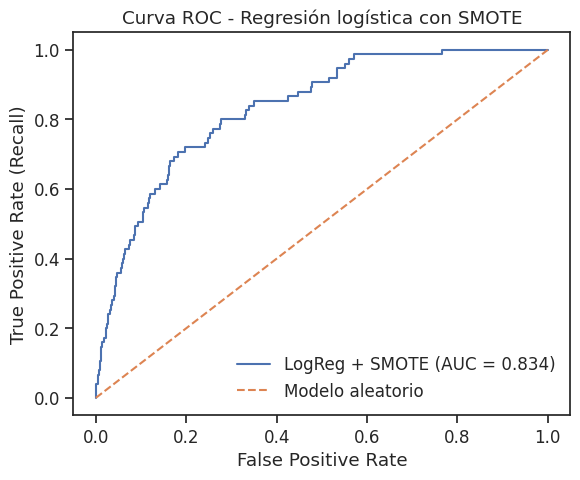

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_proba_sm)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'LogReg + SMOTE (AUC = {auc_sm:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Modelo aleatorio')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Curva ROC - Regresión logística con SMOTE')
plt.legend()
plt.tight_layout()
plt.show()

**Balanced accuracy y AUC-ROC.**  
Dado el fuerte desbalance de clases, además de accuracy, precisión, recall y F1 se evaluaron métricas más robustas: la *balanced accuracy* y el AUC-ROC. Para la regresión logística con SMOTE se obtuvo una balanced accuracy de 0.75 (en promedio se captura alrededor del 75 % de cada clase) y un AUC-ROC de 0.834. Estos valores indican que, aunque el F1 de la clase positiva es moderado, el modelo tiene una buena capacidad para ordenar correctamente a los pacientes según su riesgo y mantener un equilibrio razonable entre sensibilidad y especificidad cuando se consideran ambas clases por igual.


Por último, note como aplicar SMOTE degrada el desempeño del modelo Radom Forest:

In [ ]:
rf_sm = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:

y_pred_rf_sm = rf_sm.predict(X_test_scaled)

print("=== Random Forest entrenado con SMOTE ===")
print("Accuracy :", round(accuracy_score(y_test, y_pred_rf_sm), 3))
print("Precision:", round(precision_score(y_test, y_pred_rf_sm), 3))
print("Recall   :", round(recall_score(y_test, y_pred_rf_sm), 3))
print("F1-score :", round(f1_score(y_test, y_pred_rf_sm), 3))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf_sm))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf_sm, digits=3))


=== Random Forest entrenado con SMOTE ===
Accuracy : 0.703
Precision: 0.101
Recall   : 0.64
F1-score : 0.174

Matriz de confusión:
[[1030  428]
 [  27   48]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.974     0.706     0.819      1458
           1      0.101     0.640     0.174        75

    accuracy                          0.703      1533
   macro avg      0.538     0.673     0.497      1533
weighted avg      0.932     0.703     0.788      1533



## 5.3 Conexión con la implementación en C y conclusiones finales

Los resultados anteriores se utilizaron como guía para seleccionar un modelo supervisado (regresión logística) para su **implementación algorítmica en lenguaje C**, cumpliendo así el último objetivo de la tarea. La implementación en C reproduce el preprocesamiento (normalización) y la regla de decisión del clasificador entrenado en Python.

En conjunto, el trabajo:

* Aplica técnicas de aprendizaje **no supervisado** (PCA y K-means) para explorar la estructura del conjunto de datos.
* Desarrolla y evalúa modelos de aprendizaje **supervisado** (regresión logística y Random Forest) para predecir la variable categórica `stroke`.
* Analiza críticamente el impacto del **desbalance de clases** y propone mejoras mediante modelos coste-sensibles y **SMOTE**.
* Integra el análisis estadístico con una **implementación en C**, demostrando comprensión algorítmica del modelo.

Aunque las métricas alcanzadas son todavía mejorables y el modelo no debe interpretarse como una herramienta diagnóstica definitiva, el estudio ofrece una base sólida para trabajos futuros sobre predicción de accidente cerebrovascular a partir de datos clínicos tabulares.


# **Discusión crítica**

El análisis realizado muestra que el dataset tiene varias limitaciones estructurales. En primer lugar, la prevalencia de ACV es muy baja, lo que genera un problema de clases desbalanceadas. Además, las variables disponibles son relativamente simples, no incluyen información temporal como algún historial, ni datos clínicos más específicos. Esto lo vemos reflejado en los resultados de k-means sobre PCA, que identifica grupos con diferentes perfiles, pero estos clusters no coinciden de manera clara con la ocurrencia de ACV. En resumen, la estructura apunta a una distribución heterogénea de la población y no a una separación entre pacientes con y sin ACV.

En cuanto a los modelos, tanto la regresión logística como el random forest consiguen mejorar a un clasificador trivial, pero las métricas siguen siendo bajas para la clase de interés.Icluso después de ajustar hiperparámetros y aplicar SMOTE, el F1 de la clase *stroke* se mantiene alrededor de 0.21-0.23, con precisión baja y recall alto. Esto muestra que los modelos sí toman cierta señal (AUC-ROC > 0.80, balance accuracy = 0.75), pero que la información de las variables no basta para separar significativamente a los pacientes según la clase de interés.

Respondiendo a la pregunta sobre la aplicabilidad al problema real, los resultados sobre este dataset indican que no deberían utilizarse como herramientas de diagnóstico autónomo, sino como sistemas de apoyo a la decisión. Un clasificador con alta sensibilidad pero baja precisón puede ser útil para priorizar pacientes, siempre que haya una segunda capa se evaluación clínica. El desempeño obtenido muestra definitivamente la necesidad de datos más ricos, y de conjuntos con mayor número de casos postivos para lograr modelos más robustos.

# 6. Implementación en C del algoritmo supervisado

En esta sección se implementa en lenguaje C un modelo de aprendizaje supervisado para la predicción de accidente cerebrovascular (ACV), con el objetivo de demostrar comprensión algorítmica más allá del uso de librerías de alto nivel.





## 6.1 Selección y justificación del algoritmo

El algoritmo supervisado elegido para implementar en C es la **Regresión Logística binaria**. Este modelo es apropiado para el problema planteado porque:

- La variable objetivo es binaria (`stroke` = 0 o 1), es decir, predice la ocurrencia o no de un accidente cerebrovascular (ACV).
- La Regresión Logística modela directamente la **probabilidad** de pertenecer a la clase positiva mediante una función sigmoide, lo cual es natural en problemas de riesgo clínico.
- Es un modelo relativamente sencillo desde el punto de vista algorítmico: se basa en una combinación lineal de las características y en una función de activación sigmoide. Esto facilita su implementación desde cero en C sin depender de librerías externas complejas.
- Al mismo tiempo, es un modelo muy utilizado en la práctica médica y epidemiológica, lo que permite interpretar los pesos como indicadores de la influencia de cada variable sobre el riesgo de ACV.

En resumen, la Regresión Logística es un **buen compromiso entre interpretabilidad, simplicidad algorítmica e idoneidad para clasificación binaria**, cumpliendo con el requisito de la tarea de seleccionar un algoritmo supervisado implementable en C.


## 6.2 Diseño de estructuras de datos y funciones

Para la implementación en C se definieron estructuras de datos simples y funciones modulares que separan claramente las responsabilidades del programa, de acuerdo con el ítem 22 de la tarea.

**Estructuras de datos principales**

- **Matriz de características**: se representa como un arreglo bidimensional `double X[n_samples][n_features]`, donde cada fila corresponde a un paciente y cada columna a una característica numérica ya preprocesada (por ejemplo: edad estandarizada, hipertensión, enfermedad cardíaca, glucosa promedio, IMC).
- **Vector de etiquetas**: se almacena en un arreglo `int y[n_samples]`, donde cada posición indica si el paciente ha tenido (`1`) o no (`0`) un ACV.
- **Parámetros del modelo**:
  - `double w[n_features]`: vector de pesos de la Regresión Logística.
  - `double b`: término independiente (bias o intercepto).

Las estructuras principales del modelo son *struct Dataset* y *struct LogisticModel*:
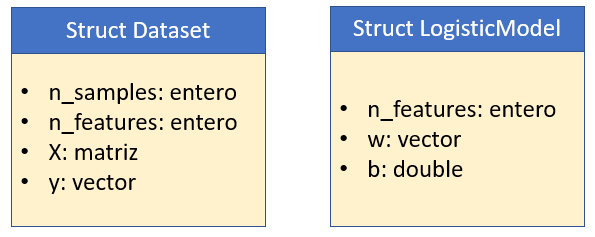



El **flujo principal** del modelo es el siguiente:

1. Definir n_samples, n_test y n_features según el subconjunto usado.
2. Cargar los datos desde archivos CSV:

      *  train = load_dataset("sample_data/train_ministroke.csv", n_samples, n_features)
      *  test = load_dataset("sample_data/test_ministroke.csv", n_samples, n_features)


3. Inicializar el modelo.
4. Entrenar la regresión logística con descenso de gradiente.
5. Evaluar el desempeño:
      * calcular la matriz de confusión y accuracy en train
      * calcular la matriz de confusión y accuracy en test
6. Liberar la memoria reservada para el modelo y los datasets.



Fuera del proceso del cálculo de métricas, lo más importantes es el proceso de entrenamiento, que describimos a continuación.

**Pseudocódigo del entrenamiento**:

**Entradas**:


*   model: LogisticModel con pesos w y sesgo b inicializados
*   data: Dataset (X,y)
*   learning rate
*   epochs

**Para epoch = 1 hasta epochs:**

      Inicializar gradientes grad_w[0,...,n_features-1] = 0, grad_b = 0

      Para cada muestra i \in {0,...,n_samples-1}:

            x = X[i], y_true = y[i]

            calculamos z, que es el producto punto de los pesos con el vector de la fila más el sesgo:

            z = b + x*w

            luego, la probabilidad es la sigmoide de z:

            p = sigmoid(z)

            gradiente respecto a z:

            error = p - y

            acumulamos los gradientes:

            Para j \in {0,...,n_features-1}:
                grad_w[j] += error * x[j]
            grad_b += error

      Se promedian los gradientes:

      Para j \in {0,...,n_features-1}:
          grad_w[j] = grad_w[j] / n_samples
      grad_b = grad_b / n_samples

      Se actualizan los pesos y sesgo:

      Para j \in {0,...,n_features-1}:
          w[j] = w[j] - learning_rate * grad_w[j]
      b = b - learning_rate * grad_b






# Resultados implementación

El modelo de regresión logística implementado en C se entrenó sobre un subconjunto del dataset original, utilizando 10 variables predictorias. Inicialmente se evaluó el modelo con el umbral estándar de 0.5 para convertir las probabilidades en etiquetas. Bajo esas condiciones se alcanzó un score de *precision* cerca al 95% tanto en el entrenamiento como en la prueba, pero la matriz de confusión mostraba que el modelo predecía todo como *no stroke*, resultado coherente con el fuerte desbalance de clases del problema.

Para evitar la solución trivial a la que se decantaba el modelo, se exploró el ajuste de umbral de 0.5 a 0.10 en la función de predicción. Con este cambio, la matriz de confusión en el conjunto de entrenamiento pasó a ser: TN = 2904, FP = 499, FN = 68, TP = 106 (sobre 3577 observaciones); a partir de esos valores se obtubieron las métricas para la clase positiva *stroke*:

*   Precisión = 0.175
*   Recall = 0.61
*   F1 = 0.27
*   Accuracy = 84.15

Es decir, el modelo deja de comportarse como un clasificador trivial, sacrifica parte de la *accuracy* para ganar sesibilidad a la clase de interés, identificando alrededor del 61% de los casos positivos.

Al comparar estos resultados con los obtenido en Python con *sklearn*, se observa que la regresión logística con técnicas de manejo del desbalance alcanza, en el conjunto de prueba, una *accuracy* en torno al 73%, con precisión = 0.13, recall = 0.77 y F1 = 0.22 para la clase *stroke*. Es decir, el modelo en Python, que usa **class_weight = "balanced"** y oversampling, prioriza aún más la sensibilidad, mientras que la implementación en C debe recurrir al ajuste de umbral para aproximarse a un balance entre la detección de positivos y la *accuracy* global.


En conjunto, la comparación muestra que la implementación en C reproduce el comportamiento esperado de una regresión logística “clásica” en un problema desbalanceado y permite explorar, de manera explícita, cómo el simple cambio del umbral de decisión modifica las métricas de desempeño frente al modelo más sofisticado entrenado en Python.






In [ ]:
# Selección:

features_c = [
    'age',
    'bmi',
    'avg_glucose_level',
    'ever_married_Yes',
    'heart_disease',
    'hypertension',
    'work_type_children',
    'work_type_Self-employed',
    'smoking_status_formerly smoked',
    'Residence_type_Urban'
    ]
target_c = "stroke"

X_c = X_encoded[features_c].copy()
y_c = df[target_c].astype(int).copy()

# Imputar 'bmi' en X_c con la mediana (igual que en el preprocesamiento general)
# Asegurarse de que X_c['bmi'] no tenga NaNs antes de la estandarización
bmi_median_c = X_c["bmi"].median()
X_c["bmi"] = X_c["bmi"].fillna(bmi_median_c)

print("Shape total X_c:", X_c.shape)
print("Clases en y_c:\n", y_c.value_counts())

Shape total X_c: (5110, 10)
Clases en y_c:
 stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
# train/test split:

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_c,
    y_c,
    test_size=0.30,
    random_state=42,
    stratify=y_c
)

print("Train:", X_train_c.shape, "Test:", X_test_c.shape)
print("Stroke train:", y_train_c.mean().round(3), "Stroke test:", y_test_c.mean().round(3))


Train: (3577, 10) Test: (1533, 10)
Stroke train: 0.049 Stroke test: 0.049


In [ ]:
scaler_c = StandardScaler()

X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled  = scaler_c.transform(X_test_c)

print("Train scaled shape:", X_train_c_scaled.shape)
print("Test scaled shape:", X_test_c_scaled.shape)


Train scaled shape: (3577, 10)
Test scaled shape: (1533, 10)


In [ ]:
import os

os.makedirs("sample_data/", exist_ok=True)

train_array = np.hstack([
    X_train_c_scaled,
    y_train_c.values.reshape(-1, 1)
])

test_array = np.hstack([
    X_test_c_scaled,
    y_test_c.values.reshape(-1, 1)
])

# Guardar a CSV (sin encabezados, solo números)
np.savetxt("sample_data/train_ministroke.csv", train_array, delimiter=",")
np.savetxt("sample_data/test_ministroke.csv",  test_array,  delimiter=",")

# Verificamos las primeras líneas
print("Train (primeras 5 filas):")
!head -n 5 sample_data/train_ministroke.csv

print("\nTest (primeras 5 filas):")
!head -n 5 sample_data/test_ministroke.csv

Train (primeras 5 filas):
3.890437015726672665e-01,-8.826170044585536223e-01,4.189210515144752706e-02,7.176600878509248327e-01,-2.388160315529800626e-01,-3.261943008853709358e-01,-3.941595579279325579e-01,-4.439840319378575151e-01,2.160735919713121955e+00,-1.008140485190678337e+00,0.000000000000000000e+00
8.336870947597357917e-01,9.638262735154883298e-01,-3.924752530309308929e-01,7.176600878509248327e-01,-2.388160315529800626e-01,-3.261943008853709358e-01,-3.941595579279325579e-01,-4.439840319378575151e-01,-4.628052835502308171e-01,9.919252472147884747e-01,0.000000000000000000e+00
1.678509541815165873e+00,7.288511141612544209e-02,-2.329253576329979036e-01,-1.393417325177659372e+00,4.187323579146552177e+00,-3.261943008853709358e-01,-3.941595579279325579e-01,2.252333255399521672e+00,-4.628052835502308171e-01,-1.008140485190678337e+00,0.000000000000000000e+00
5.224367195287877852e-01,-1.078855591547596415e-01,-7.206985385427177038e-01,7.176600878509248327e-01,-2.388160315529800626e-01,-3.

In [ ]:
%%writefile logreg.c


#include <stdio.h>
#include <stdlib.h>
#include <math.h>


/*Modelo*/

typedef struct {
    int n_features;
    double *w;
    double b;
} LogisticModel;

/* Prototypes to ensure const-correct signatures are visible to the compiler */
double sigmoid(double z);
double predict_proba(const LogisticModel *model, const double *x);
int predict_label(const LogisticModel *model, const double *x, double threshold);




typedef struct {
    int n_samples;
    int n_features;
    double **X;  // X[i][j]
    int *y;      // y[i]
} Dataset;

Dataset allocate_dataset(int n_samples, int n_features) {
    Dataset dataset;
    dataset.n_samples = n_samples;
    dataset.n_features = n_features;

    dataset.X = (double **)malloc(n_samples * sizeof(double *));
    for (int i = 0; i < n_samples; i++) {
        dataset.X[i] = (double *)malloc(n_features * sizeof(double));
    }

    dataset.y = (int *)malloc(n_samples * sizeof(int));

    return dataset;
}

void free_dataset(Dataset *dataset) {
    for (int i = 0; i < dataset->n_samples; i++) {
        free(dataset->X[i]);
    }
    free(dataset->X);
    free(dataset->y);
    dataset->X = NULL;
    dataset->y = NULL;
}



Dataset load_dataset(const char *filename, int n_samples, int n_features) {
    Dataset data = allocate_dataset(n_samples, n_features);

    FILE *f = fopen(filename, "r");
    if (!f) {
        printf("Error abriendo archivo %s\n", filename);
        exit(1);
    }

    for (int i = 0; i < n_samples; ++i) {
        // Leer n_features doubles y luego un int
        for (int j = 0; j < n_features; ++j) {
            if (fscanf(f, "%lf,", &data.X[i][j]) != 1) {
                printf("Error leyendo X en fila %d, col %d\n", i, j);
                exit(1);
            }
        }

        // La etiqueta al final
        double y_temp;
        if (fscanf(f, "%lf", &y_temp) != 1) {
            printf("Error leyendo y en fila %d\n", i);
            exit(1);
        }
        data.y[i] = (y_temp >= 0.5) ? 1 : 0;
    }

    fclose(f);
    return data;
}

void init_model(LogisticModel *model, int n_features) {
    model->n_features = n_features;
    model->w = (double *)malloc(n_features * sizeof(double));
    model->b = 0.0;


    for (int i = 0; i < n_features; i++) {
        model->w[i] = 0.0;
    }
}

/* Función sigmoide */
double sigmoid(double z) {
    return 1.0 / (1.0 + exp(-z));
}


/* Predicción */

double predict_proba(const LogisticModel *model, const double *x) {
    double z = model->b;
    for (int i = 0; i < model->n_features; i++) {
        z += model->w[i] * x[i];
    }
    return sigmoid(z);
}

int predict_label(const LogisticModel *model, const double *x, double threshold) {
    double p = predict_proba(model, x);
    return (p >= threshold) ? 1 : 0;
}

void train_logreg(LogisticModel *model,
                  const Dataset *data,
                  double learning_rate,
                  int epochs) {

    int n = data->n_samples;
    int d = data->n_features;

    double *grad_w = (double *)malloc(d * sizeof(double));

    for (int epoch = 0; epoch < epochs; ++epoch) {

        // Inicializar gradientes en 0
        for (int j = 0; j < d; ++j) grad_w[j] = 0.0;
        double grad_b = 0.0;

        // Recorremos todas las muestras = filas
        for (int i = 0; i < n; ++i) {
            double *x = data->X[i];
            int y = data->y[i];

            double z = model->b;
            for (int j = 0; j < d; ++j) {
                z += model->w[j] * x[j];
            }
            double p = sigmoid(z);
            double error = p - (double)y; // (p - y) es el gradiente respecto a z

            // Acumulamos gradientes
            for (int j = 0; j < d; ++j) {
                grad_w[j] += error * x[j];
            }
            grad_b += error;
        }

        // Promediamos gradientes
        for (int j = 0; j < d; ++j) {
            grad_w[j] /= (double)n;
        }
        grad_b /= (double)n;

        // Actualizamos pesos y sesgo
        for (int j = 0; j < d; ++j) {
            model->w[j] -= learning_rate * grad_w[j];
        }
        model->b -= learning_rate * grad_b;
    }

    free(grad_w);
}


double accuracy(const LogisticModel *model, const Dataset *data) {
    int correct = 0;
    for (int i = 0; i < data->n_samples; ++i) {
        int y_hat = predict_label(model, data->X[i], 0.10);
        if (y_hat == data->y[i]) correct++;
    }
    return (double)correct / (double)data->n_samples;
}

void confusion_matrix(const LogisticModel *model,
                      const Dataset *data,
                      int *tn, int *fp, int *fn, int *tp) {

    *tn = *fp = *fn = *tp = 0;

    for (int i = 0; i < data->n_samples; ++i) {
        int y_true = data->y[i];
        int y_pred = predict_label(model, data->X[i], 0.10);

        if (y_true == 0 && y_pred == 0) (*tn)++;
        else if (y_true == 0 && y_pred == 1) (*fp)++;
        else if (y_true == 1 && y_pred == 0) (*fn)++;
        else if (y_true == 1 && y_pred == 1) (*tp)++;
    }
}


int main() {

    int n_samples = 3577;
    int n_features = 10;
    int n_test = 1533;

    Dataset train = load_dataset("sample_data/train_ministroke.csv", n_samples, n_features);
    Dataset test = load_dataset("sample_data/test_ministroke.csv", n_test, n_features);

    LogisticModel model;
    init_model(&model, n_features);

    double learning_rate = 0.1;
    int epochs = 1000;

    //entrenamiento
    train_logreg(&model, &train, learning_rate, epochs);

    int tn, fp, fn, tp;
    confusion_matrix(&model, &train, &tn, &fp, &fn, &tp);
    printf("Matriz de confusión (train): TN=%d, FP=%d, FN=%d, TP=%d\n", tn, fp, fn, tp);


    confusion_matrix(&model, &test, &tn, &fp, &fn, &tp);
    printf("Matriz de confusión (test): TN=%d, FP=%d, FN=%d, TP=%d\n", tn, fp, fn, tp);

    double acc_train = accuracy(&model, &train);
    printf("Accuracy train: %.2f%%\n", acc_train * 100.0);

    double acc_test = accuracy(&model, &test);
    printf("Accuracy test: %.2f%%\n", acc_test * 100.0);

    printf("Pesos aprendidos:\n");
    for (int j = 0; j < model.n_features; ++j) {
        printf("w[%d] = %f\n", j, model.w[j]);
    }
    printf("b = %f\n", model.b);

    printf("\nAlgunas probabilidades en train:\n");
    for (int i = 0; i < 5 && i < train.n_samples; ++i) {
        double p = predict_proba(&model, train.X[i]);
        printf("i=%d, y=%d, p=%.3f\n", i, train.y[i], p);
    }



    free(model.w);
    free_dataset(&train);
    free_dataset(&test);
    return 0;
}

Overwriting logreg.c


In [ ]:
!gcc logreg.c -o logreg -lm

In [ ]:
!./logreg


Matriz de confusión (train): TN=2904, FP=499, FN=68, TP=106
Accuracy train: 84.15%
Accuracy test: 84.15%
Pesos aprendidos:
w[0] = 1.081004
w[1] = -0.104982
w[2] = 0.182097
w[3] = 0.014417
w[4] = 0.111826
w[5] = 0.123380
w[6] = 0.023754
w[7] = -0.035874
w[8] = 0.045531
w[9] = 0.001223
b = -3.459509

Algunas probabilidades en train:
i=0, y=0, p=0.053
i=1, y=0, p=0.057
i=2, y=0, p=0.198
i=3, y=0, p=0.040
i=4, y=0, p=0.019


# Reflexión técnica

La implementación de regresi+on logística en C presenta varias limitaciones técnicas. En primer lugar, la eficiencia y la aescalabilidad son limitadas, se emplea descenso gradiente por batch con complejidad `O(n\*d\*epochs)`, siendo n el número de muestras, y d el número de variables. Todo se realiza mediante bucles anidados, sin hacer uso de bibliotecas optimizadas de álgebra lineal, ni paralelización. Además, la representación de las matrices como un *double*** con múltiples llamadas a *malloc* por fila no es conveniente para grandes datasets, pues dispersa las filas en memoria, afectando el rendimiento en caché.

En términos de robustez, no se está monitorizando la convergencia de la función de pérdida; el número de épocas y la tasa de aprendizaje se fijan arbitrariamente. Tampoco se incluyó regularización (L2 o L1) en la función de costo, limitando la capacidad del modelo para evitar sobreajuste. Finalmente, todo el manejo de los datos, como el preprocesamient y escalación, fué hecho en python: el modelo en C no es autónomo per sé.

A partir de allí, podemos plantear mejoras y extensiones: sustituir bucles por llamadas a bibliotecas, habilitar paralelización para acelerar el cálculo de gradientes. Además, valdría la pena incorporar regularización L2 y permitir el ajuste de hiperparámetros sin tener que recompilar. Estas mejoras aumentarían la eficiencia y escalabilidad del modelo.